# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

api_key = weather_api_key

# Params
params = {
    "q": "Brisbane",       # City name
    "appid": api_key,      # API key
    "units": "metric"      # Units (optional: metric for Celsius)
}

response = requests.get(url, params=params)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palopo
Processing Record 2 of Set 1 | susuman
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | magadan
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | schwaz
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | nikel
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | luimneach
Processing Record 21 of Set 1 | ha giang
Processing Record 22 of Set 1 | 

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palopo,-2.9996,120.1921,24.69,90,100,1.03,ID,1738368695
1,susuman,62.7833,148.1667,-42.52,99,82,0.14,RU,1738368696
2,invercargill,-46.4000,168.3500,20.57,57,100,3.13,NZ,1738368698
3,thompson,55.7435,-97.8558,-27.78,98,29,1.92,CA,1738368685
4,edinburgh of the seven seas,-37.0676,-12.3116,17.16,83,43,7.70,SH,1738368701


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

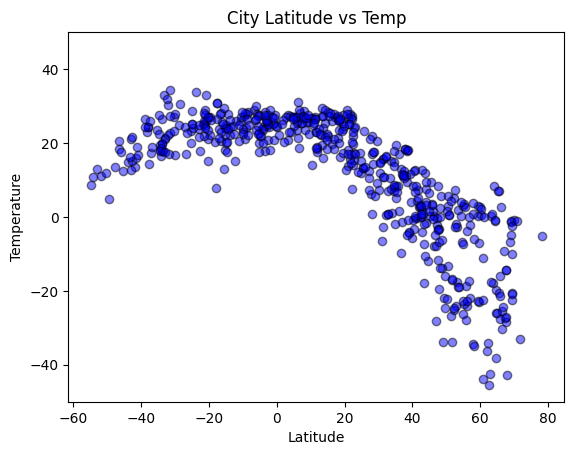

In [27]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df ["Lat"]
data = city_data_df ["Max Temp"]

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x_axis, data, marker = "o", facecolors = "blue" , edgecolors = "black" , alpha = 0.50)

plt.ylim(-50, 50)

plt.title("City Latitude vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

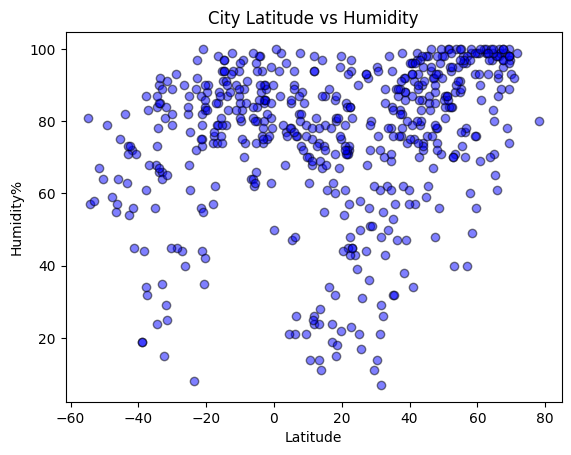

In [28]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis = city_data_df ["Lat"]
data = city_data_df ["Humidity"]


# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x_axis, data, marker = "o", facecolors = "blue" , edgecolors = "black" , alpha = 0.50)

plt.ylim()

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity%")


# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

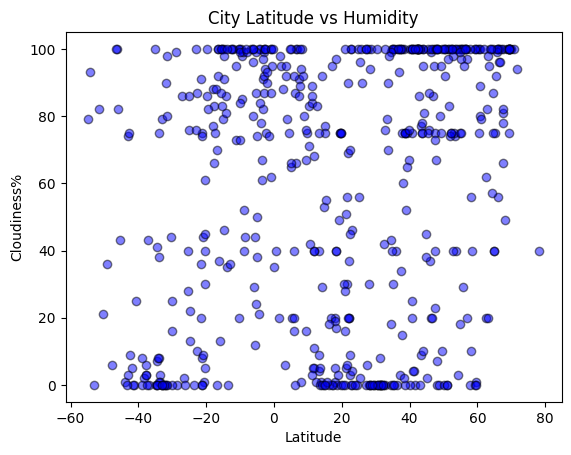

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis = city_data_df ["Lat"]
data = city_data_df ["Cloudiness"]


# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, data, marker = "o", facecolors = "blue" , edgecolors = "black" , alpha = 0.50)

plt.ylim()

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

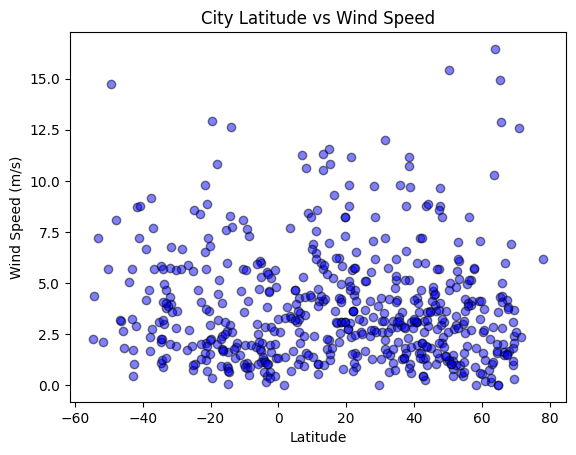

In [65]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

x_axis = city_data_df ["Lat"]
data = city_data_df ["Wind Speed"]

plt.scatter(x_axis, data, marker = "o", facecolors = "blue" , edgecolors = "black" , alpha = 0.50)

plt.ylim()

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line
    regression_line = slope * x_values + intercept
    
    # Plot scatter plot
    plt.scatter(x_values, y_values, color="blue", edgecolor="black", alpha=0.5)
    
    # Plot regression line
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Add plot details
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    
    # Display the correlation coefficient on the plot
    plt.annotate(f"R = {r_value:.2f}", (min(x_values), max(y_values) * 0.9), fontsize=12, color="red")
    
    # Save the plot
    plt.show()


In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
# Filter the city_data_df for latitudes >= 0 and create the northern_hemi_df

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,susuman,62.7833,148.1667,-42.52,99,82,0.14,RU,1738368696
3,thompson,55.7435,-97.8558,-27.78,98,29,1.92,CA,1738368685
11,magadan,59.5667,150.8000,-23.05,76,1,3.23,RU,1738368710
13,tazovsky,67.4667,78.7000,-27.43,95,100,4.17,RU,1738368712
14,schwaz,47.3391,11.7336,-2.16,92,95,1.31,AT,1738368713


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
# Filter the city_data_df for latitudes <0 and create the southern_hemi_df

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palopo,-2.9996,120.1921,24.69,90,100,1.03,ID,1738368695
2,invercargill,-46.4000,168.3500,20.57,57,100,3.13,NZ,1738368698
4,edinburgh of the seven seas,-37.0676,-12.3116,17.16,83,43,7.70,SH,1738368701
5,taltal,-25.4000,-70.4833,20.12,82,28,1.90,CL,1738368702
6,hermanus,-34.4187,19.2345,18.08,84,7,2.27,ZA,1738368704


###  Temperature vs. Latitude Linear Regression Plot

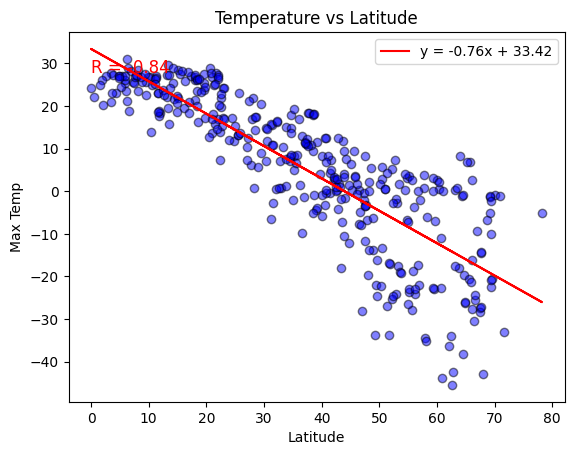

In [70]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Temperature vs Latitude"
xlabel = "Latitude"
ylabel= "Max Temp"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

# YOUR CODE HERE

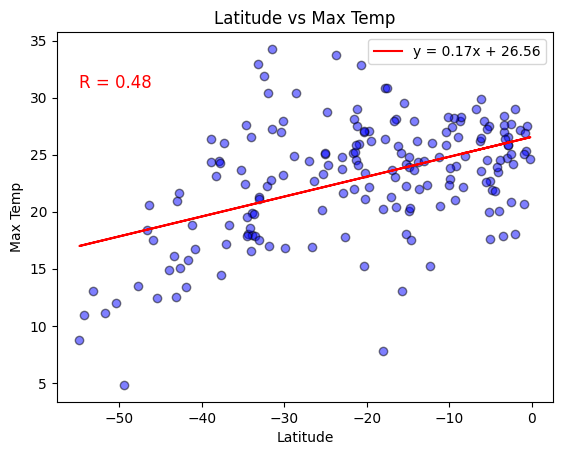

In [72]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
xlabel = "Latitude"
ylabel= "Max Temp"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE There is not a strong enough of a relationship between latitude and max temp to really note here at r=0.48. (Temperature vs latitude above, however, at r=0.84 is noteable.)

### Humidity vs. Latitude Linear Regression Plot

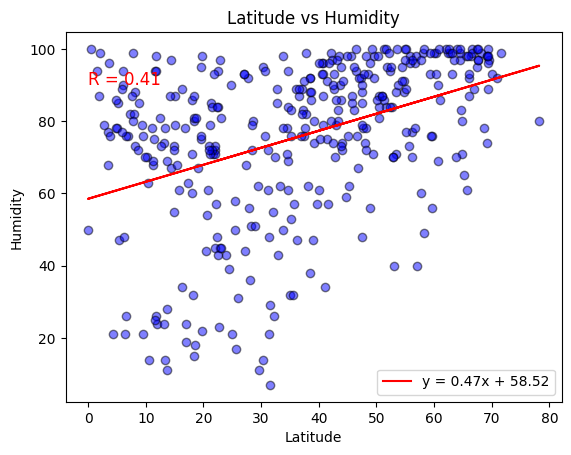

In [73]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
xlabel = "Latitude"
ylabel= "Humidity"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

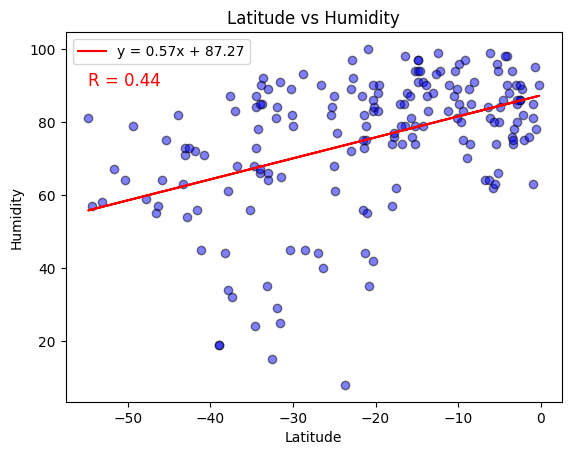

In [74]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
xlabel = "Latitude"
ylabel= "Humidity"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE There is not a strong enough of a relationship between latitude and humidity to really note here at r=0.44.

### Cloudiness vs. Latitude Linear Regression Plot

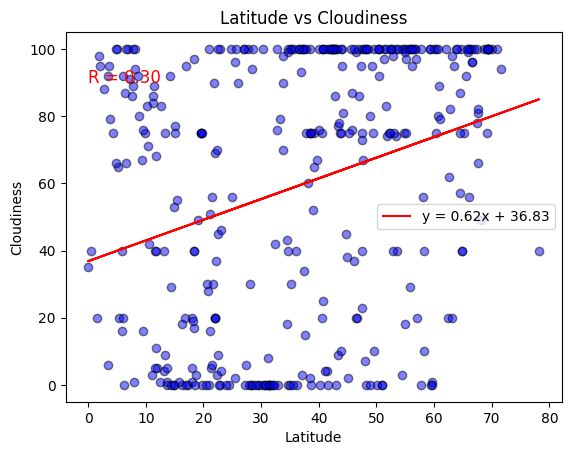

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel= "Cloudiness"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

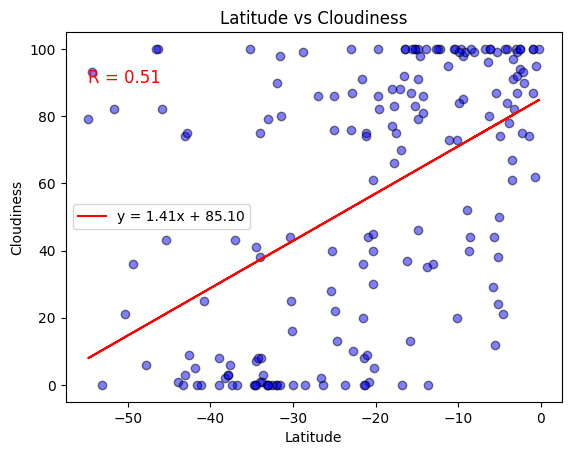

In [76]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel= "Cloudiness"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE There is not a strong enough of a relationship between latitude and cloudiness to really note here at r=0.51.

### Wind Speed vs. Latitude Linear Regression Plot

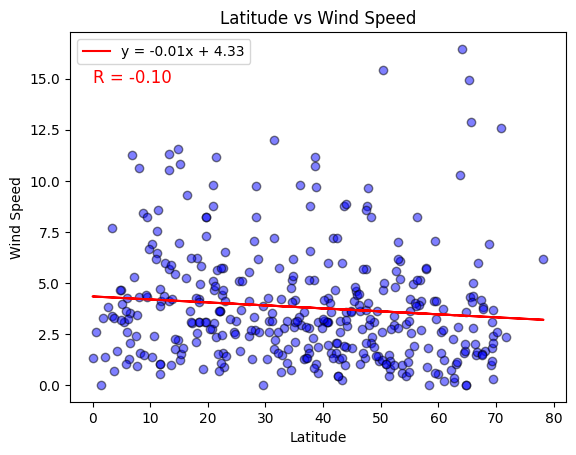

In [77]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel= "Wind Speed"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)


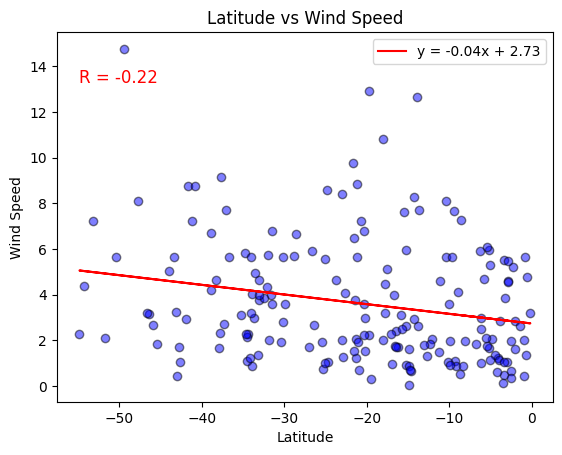

In [79]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel= "Wind Speed"

plot_linear_regression(x_values, y_values, title, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE This is a very weak relationship between latitude and wind speed at r=0.22.